<a href="https://colab.research.google.com/github/ansal1202/Prediction-of-Amazon-Prime-Subscription/blob/main/Amazon%E8%A8%82%E9%96%B1%E7%94%A8%E6%88%B6%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Download kaggle data in Google Colab
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download -d 'arnavsmayan/amazon-prime-userbase-dataset'
! mkdir amazon-prime-userbase
! unzip amazon-prime-userbase-dataset.zip -d amazon-prime-userbase


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/arnavsmayan/amazon-prime-userbase-dataset
License(s): CC0-1.0
  0% 0.00/104k [00:00<?, ?B/s]
100% 104k/104k [00:00<00:00, 50.5MB/s]
Archive:  amazon-prime-userbase-dataset.zip
  inflating: amazon-prime-userbase/amazon_prime_users.csv  


In [65]:
#載入資料集
import pandas as pd
df = pd.read_csv('amazon-prime-userbase/amazon_prime_users.csv')
df

,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions
0,1,Ronald Murphy,williamholland@example.com,williamholland,1953-06-03,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3
1,2,Scott Allen,scott22@example.org,scott22,1978-07-08,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7
2,3,Jonathan Parrish,brooke16@example.org,brooke16,1994-12-06,Female,Youngfort,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8
3,4,Megan Williams,elizabeth31@example.net,elizabeth31,1964-12-22,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7
4,5,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,1961-06-04,Male,Port Deborah,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Michael Lopez,williamsroberto@example.org,williamsroberto,1967-08-19,Male,Smithport,2024-01-25,2025-01-24,Annual,Visa,Auto-renew,Frequent,Electronics,Comedy,Smartphone,Medium,4.9,2
2496,2497,Matthew Woodard,lkaiser@example.com,lkaiser,1980-10-23,Male,Ethanport,2024-03-03,2025-03-03,Annual,Amex,Manual,Frequent,Books,Comedy,Smart TV,Medium,4.0,0
2497,2498,Morgan Barnes,erikaholland@example.net,erikaholland,1972-03-31,Female,Alexandraborough,2024-02-09,2025-02-08,Annual,Visa,Manual,Frequent,Electronics,Documentary,Tablet,Low,4.9,8
2498,2499,Gina Castaneda,reedcourtney@example.net,reedcourtney,1965-08-02,Female,Williammouth,2024-02-18,2025-02-17,Monthly,Visa,Manual,Regular,Clothing,Comedy,Smartphone,High,3.4,7


In [26]:
# 確認資料型態
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   User ID                        2500 non-null   int64  
 1   Name                           2500 non-null   object 
 2   Email Address                  2500 non-null   object 
 3   Username                       2500 non-null   object 
 4   Date of Birth                  2500 non-null   object 
 5   Gender                         2500 non-null   object 
 6   Location                       2500 non-null   object 
 7   Membership Start Date          2500 non-null   object 
 8   Membership End Date            2500 non-null   object 
 9   Subscription Plan              2500 non-null   object 
 10  Payment Information            2500 non-null   object 
 11  Renewal Status                 2500 non-null   object 
 12  Usage Frequency                2500 non-null   o

In [ ]:
df.describe()

,User ID,Feedback/Ratings,Customer Support Interactions
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,4.004760,4.951600
std,721.83216,0.580769,3.191572
min,1.00000,3.000000,0.000000
25%,625.75000,3.500000,2.000000
50%,1250.50000,4.000000,5.000000
75%,1875.25000,4.500000,8.000000
max,2500.00000,5.000000,10.000000


In [ ]:
# 檢查是否有缺失值
df.isnull().any()

,0
User ID,False
Name,False
Email Address,False
Username,False
Date of Birth,False
Gender,False
Location,False
Membership Start Date,False
Membership End Date,False
Subscription Plan,False


**資料前處理**

* 無缺失值需要處理
* 刪除多餘的欄位
 * 用戶資料(User ID、Name、Email Address 、Username 、Location)

* 轉換資料格式
 * 字串轉日期(Membership Start Date  、Membership End Date 、Date of Birth)
 * 轉換類別欄位








In [66]:
# 刪除不需要的欄位
df_copy = df.copy()
df_copy = df_copy.drop(['User ID', 'Name', 'Email Address', 'Username', 'Location'], axis=1)
# 轉換時間格式
date_columns = ['Date of Birth', 'Membership Start Date', 'Membership End Date']
df_copy[date_columns] = df_copy[date_columns].apply(pd.to_datetime)
df_copy

,Date of Birth,Gender,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions
0,1953-06-03,Male,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3
1,1978-07-08,Male,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7
2,1994-12-06,Female,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8
3,1964-12-22,Female,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7
4,1961-06-04,Male,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1967-08-19,Male,2024-01-25,2025-01-24,Annual,Visa,Auto-renew,Frequent,Electronics,Comedy,Smartphone,Medium,4.9,2
2496,1980-10-23,Male,2024-03-03,2025-03-03,Annual,Amex,Manual,Frequent,Books,Comedy,Smart TV,Medium,4.0,0
2497,1972-03-31,Female,2024-02-09,2025-02-08,Annual,Visa,Manual,Frequent,Electronics,Documentary,Tablet,Low,4.9,8
2498,1965-08-02,Female,2024-02-18,2025-02-17,Monthly,Visa,Manual,Regular,Clothing,Comedy,Smartphone,High,3.4,7


In [4]:
amazon_baseline1= df_copy
# 轉換Subscription Plan
amazon_baseline1['Subscription Plan'] = amazon_baseline1['Subscription Plan'].replace({'Annual':1,'Monthly':0})
#使用OneHotEncoder轉換資料型別，並替換掉原本欄位
columns_to_dummy = [
    'Gender', 'Payment Information', 'Renewal Status', 'Usage Frequency', 'Purchase History', 'Favorite Genres', 'Devices Used', 'Engagement Metrics'
]
amazon_baseline1 = pd.get_dummies(amazon_baseline1, columns=columns_to_dummy, prefix=columns_to_dummy, drop_first=True)
#將bool轉換成int
amazon_baseline1 = amazon_baseline1.astype({col: 'int' for col in amazon_baseline1.select_dtypes(include='bool').columns})


<ipython-input-4-d323daa06a3a>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  amazon_baseline1['Subscription Plan'] = amazon_baseline1['Subscription Plan'].replace({'Annual':1,'Monthly':0})


In [5]:
#模型無法處理時間格式，先移除
datetime_columns = amazon_baseline1.select_dtypes(include=['datetime64[ns]']).columns
amazon_baseline1 = amazon_baseline1.drop(columns=datetime_columns)

**模型分析**

建立baseline1

In [6]:
# 拆分訓練集與測試集
from sklearn.model_selection import train_test_split

X = amazon_baseline1.drop('Subscription Plan', axis = 1)
y = amazon_baseline1['Subscription Plan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 43, stratify=y_train)

display(X_train.shape)
display(X_test.shape)
display(X_val.shape)

(1800, 20)

(500, 20)

(200, 20)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier(n_estimators=20, random_state=42)
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 5)
print(rfc_eval.mean())



0.5183333333333333


**Conclusion**

使用 Logistic Regression 交叉驗證後，Accuracy 平均值約為0.51，後續版本的準確度將不低於這個值


**探索Subscription Plan和其他欄位間的關係**

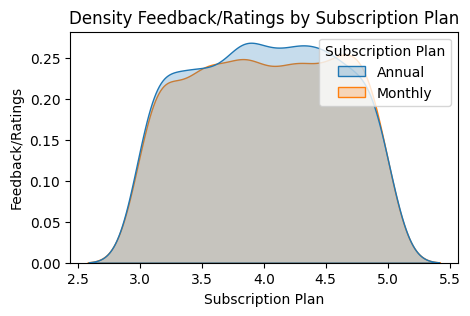

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
#先查看數值欄位
#觀察Feedback/Ratings和Subscription Plan的關係
plt.figure(figsize=(5,3))
sns.kdeplot(data=df, x='Feedback/Ratings', hue='Subscription Plan', fill=True)
plt.title("Density Feedback/Ratings by Subscription Plan")
plt.xlabel("Subscription Plan")
plt.ylabel("Feedback/Ratings")
plt.show()

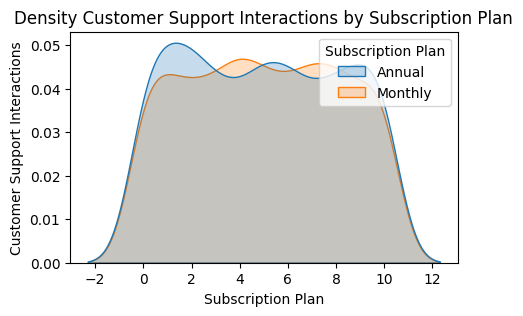

In [16]:
#觀察Customer Support Interactions和Subscription Plan的關係
plt.figure(figsize=(5,3))
sns.kdeplot(data=df, x='Customer Support Interactions', hue='Subscription Plan', fill=True)
plt.title("Density Customer Support Interactions by Subscription Plan")
plt.xlabel("Subscription Plan")
plt.ylabel("Customer Support Interactions")
plt.show()

Feedback/Ratings 、Customer Support Interactions和Subscription Plan關係不明顯，可以先保留

---



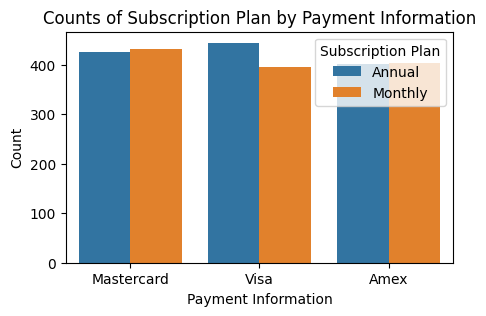

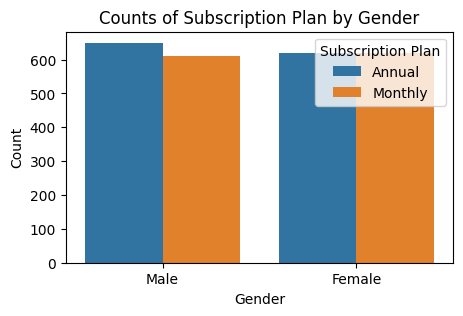

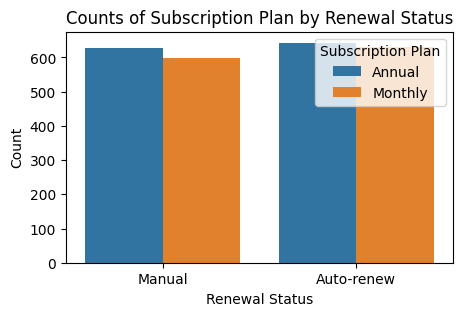

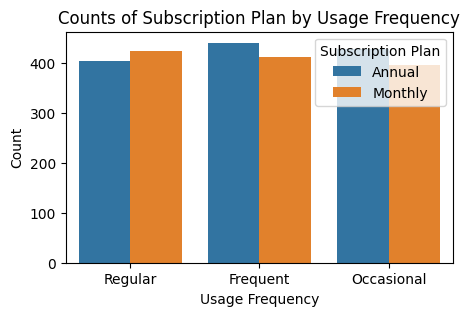

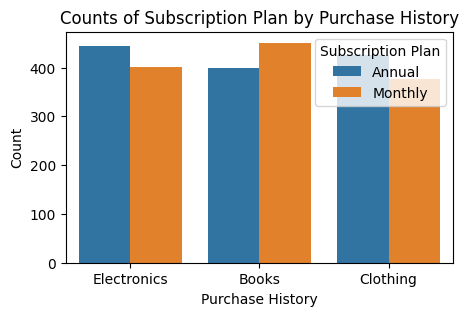

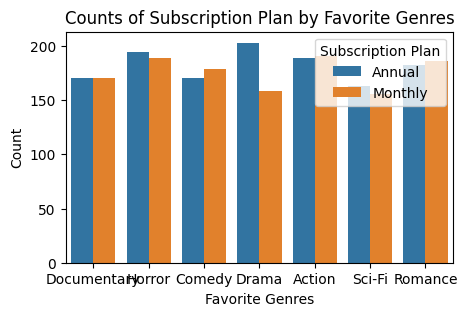

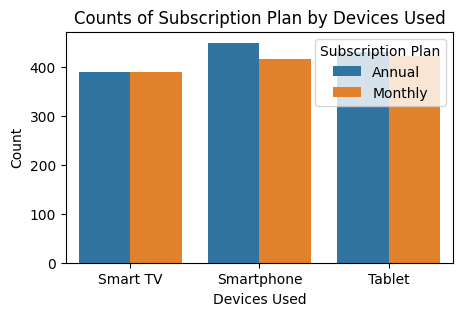

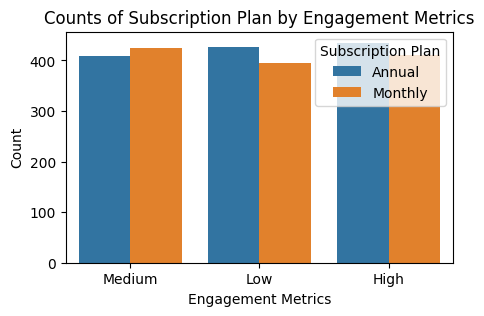

In [67]:
#查看類別欄位跟 Subscription Plan 的關係
categorical_vars = ['Payment Information', 'Gender', 'Renewal Status','Usage Frequency','Purchase History','Favorite Genres','Devices Used','Engagement Metrics']

for var in categorical_vars:
    plt.figure(figsize=(5,3))
    sns.countplot(data=df, x=var, hue='Subscription Plan')
    plt.title(f"Counts of Subscription Plan by {var}")
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.legend(title="Subscription Plan")
    plt.show()

* **Subscription Plan跟其他欄位似乎沒有顯卓的關係**
* **有些特徵在Annual跟Monthly幾乎沒有差別，將其移除 :** 'Gender','Renewal Status','Devices Used','Payment Information'




In [68]:
data_model = df_copy.copy()
#刪除不需要的特徵
data_model = data_model.drop(['Gender','Renewal Status','Devices Used','Payment Information'], axis=1)


# **特徵工程**

1.建立新特徵 : 查看不同月份的訂閱是否對Subscription Plan有不同的偏好

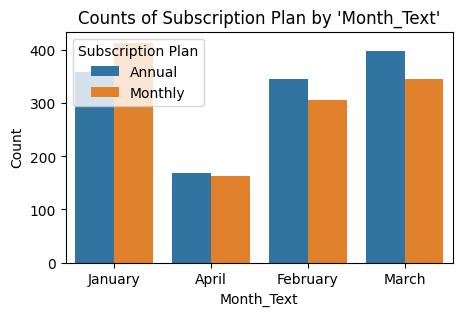

In [69]:
#取出日期的月份名稱
data_model['Month_Text'] = data_model['Membership Start Date'].dt.month_name()

plt.figure(figsize=(5,3))
sns.countplot(data=data_model, x='Month_Text', hue='Subscription Plan')
plt.title("Counts of Subscription Plan by 'Month_Text'")
plt.xlabel('Month_Text')
plt.ylabel("Count")
plt.legend(title="Subscription Plan")
plt.show()



2.將篩選過的類別欄位轉換成數值

In [70]:
#根據usage frequency 建立 mapping dictionary
usage_frequency_mapping = {
    'Occasional': 1,
    'Regular': 2,
    'Frequent': 3
}

#根據engagement metrics 建立 mapping dictionary
engagement_metrics_mapping = {
    'Low': 1,
    'Medium': 2,
    'High': 3
}

#轉換usage frequency和engagement metrics的資料型別
data_model['Usage Frequency'] = data_model['Usage Frequency'].map(usage_frequency_mapping)
data_model['Engagement Metrics'] = data_model['Engagement Metrics'].map(engagement_metrics_mapping)

In [71]:
#使用OneHotEncoder轉換資料型別，並替換掉原本欄位

data_model = pd.get_dummies(data_model,columns=['Purchase History'],prefix='',prefix_sep='',dtype=int)
data_model = pd.get_dummies(data_model,columns=['Favorite Genres'],prefix='',prefix_sep='',dtype=int)
data_model = pd.get_dummies(data_model,columns=['Month_Text'],prefix='',prefix_sep='',dtype=int)

In [72]:
# 轉換Subscription Plan的資料型別
data_model['Subscription Plan'] = data_model['Subscription Plan'].replace({'Annual':1,'Monthly':0})

<ipython-input-72-399cee2e3126>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_model['Subscription Plan'] = data_model['Subscription Plan'].replace({'Annual':1,'Monthly':0})


In [73]:
# 移除多餘欄位
data_model = data_model.drop(['Date of Birth', 'Membership Start Date', 'Membership End Date'], axis=1)

In [74]:
data_model.head()

,Subscription Plan,Usage Frequency,Engagement Metrics,Feedback/Ratings,Customer Support Interactions,Books,Clothing,Electronics,Action,Comedy,Documentary,Drama,Horror,Romance,Sci-Fi,April,February,January,March
0,1,2,2,3.6,3,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1,0,2,2,3.8,7,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,0,2,1,3.3,8,1,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,2,3,3.3,7,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,1,3,1,4.3,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0


<Axes: >

<Figure size 1200x1000 with 0 Axes>

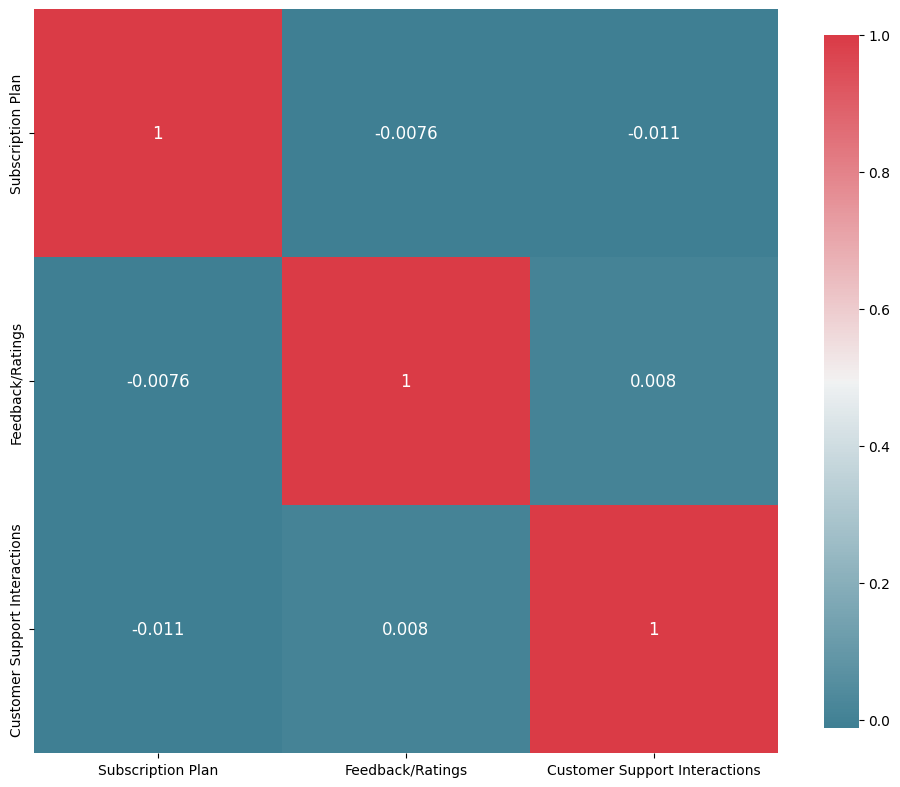

In [75]:
#使用 Pearson 係數計算相關性
corr = data_model[['Subscription Plan', 'Feedback/Ratings', 'Customer Support Interactions']].corr()
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
plt.figure(figsize=(12, 10))
sns.heatmap(
        corr,
        cmap = cmap,
        square=True,
        cbar_kws={ 'shrink' : .9 },
        ax = plt.subplots( figsize =( 12 , 10 ) )[1],
        annot = True,
        annot_kws = { 'fontsize' : 12 }
)

<Axes: >

<Figure size 1200x1000 with 0 Axes>

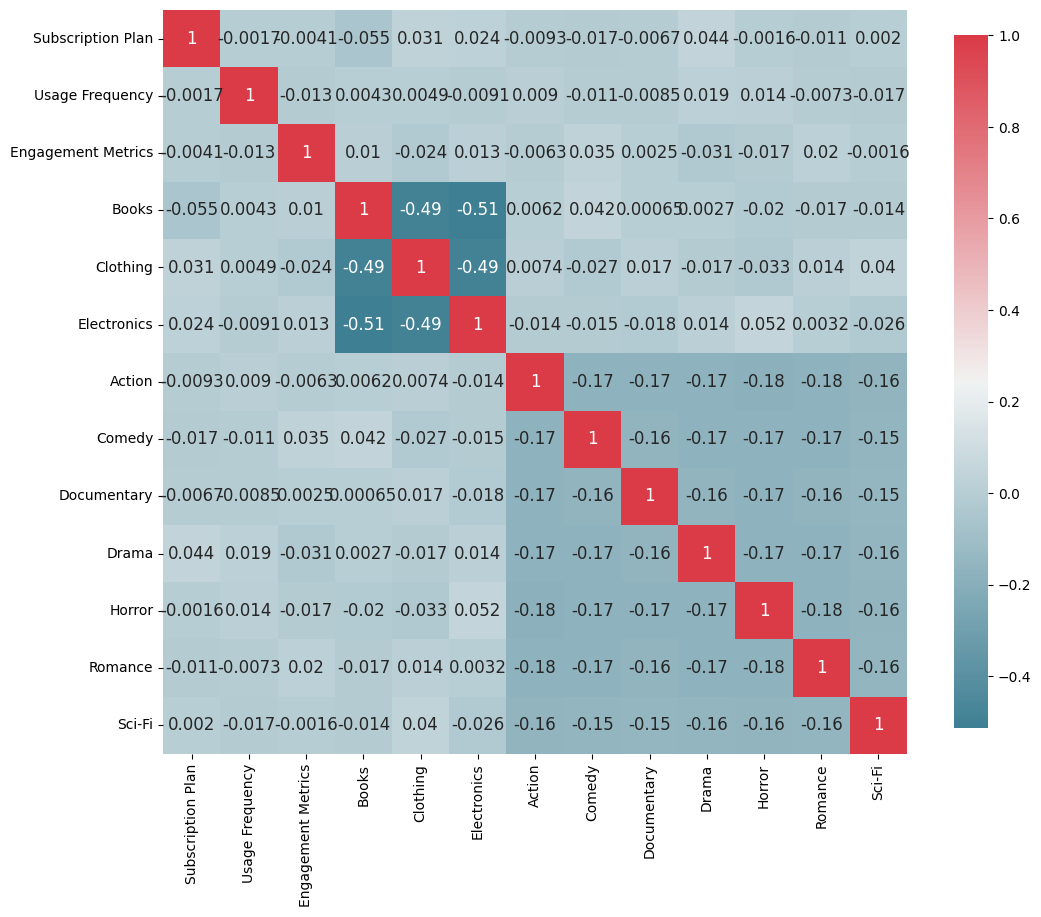

In [76]:
corr = data_model[['Subscription Plan', 'Usage Frequency', 'Engagement Metrics','Books','Clothing','Electronics','Action','Comedy','Documentary','Drama','Horror','Romance','Sci-Fi']].corr()
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
plt.figure(figsize=(12, 10))
sns.heatmap(
        corr,
        cmap = cmap,
        square=True,
        cbar_kws={ 'shrink' : .9 },
        ax = plt.subplots( figsize =( 12 , 10 ) )[1],
        annot = True,
        annot_kws = { 'fontsize' : 12 }
)

<Axes: >

<Figure size 1200x1000 with 0 Axes>

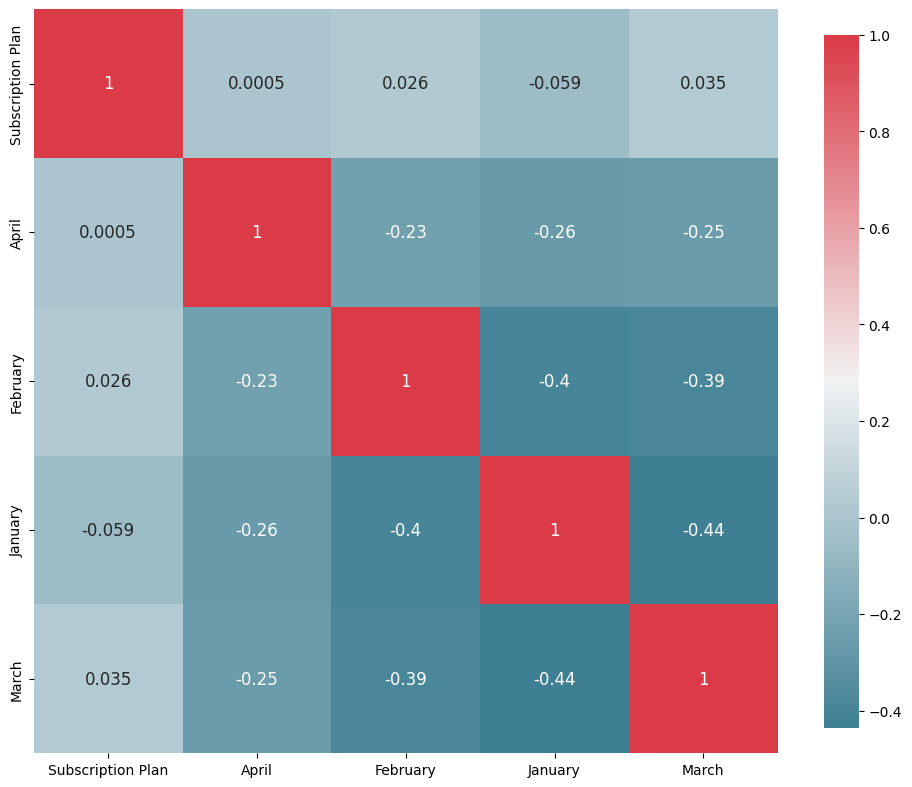

In [77]:
#使用 Pearson 查看新特徵的相關性
corr = data_model[['Subscription Plan','April','February','January','March']].corr()
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
plt.figure(figsize=(12, 10))
sns.heatmap(
        corr,
        cmap = cmap,
        square=True,
        cbar_kws={ 'shrink' : .9 },
        ax = plt.subplots( figsize =( 12 , 10 ) )[1],
        annot = True,
        annot_kws = { 'fontsize' : 12 }
)

In [22]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Subscription Plan              2500 non-null   int64  
 1   Usage Frequency                2500 non-null   int64  
 2   Engagement Metrics             2500 non-null   int64  
 3   Feedback/Ratings               2500 non-null   float64
 4   Customer Support Interactions  2500 non-null   int64  
 5   Purchase History_Books         2500 non-null   int64  
 6   Purchase History_Clothing      2500 non-null   int64  
 7   Purchase History_Electronics   2500 non-null   int64  
 8   Favorite Genres_Action         2500 non-null   int64  
 9   Favorite Genres_Comedy         2500 non-null   int64  
 10  Favorite Genres_Documentary    2500 non-null   int64  
 11  Favorite Genres_Drama          2500 non-null   int64  
 12  Favorite Genres_Horror         2500 non-null   i

# **模型分析**

In [40]:
# 載入模型
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [79]:
# 拆分訓練集和測試集
X = [
    'Customer Support Interactions',
    'Books','Clothing','Electronics',
    'Comedy','Drama','Romance'
]
y = ['Subscription Plan']

train_X = data_model[X]
train_y = data_model[y]

# 使用 Random Forest Classifier 模型
rfc = RandomForestClassifier(n_estimators=20, random_state=42)
scores = cross_val_score(rfc,train_X,train_y.values.ravel(),cv=5,scoring='accuracy')
print(scores)
print(scores.mean())


[0.516 0.506 0.55  0.492 0.49 ]
0.5108


In [82]:
#加入新特徵查看訓練結果
X = [
    'Customer Support Interactions',
    'Books','Clothing','Electronics',
    'Comedy','Drama','Romance',
    'April','February','January','March'
]
y = ['Subscription Plan']

train_X = data_model[X]
train_y = data_model[y]


rfc = RandomForestClassifier(n_estimators=20, random_state=42)
scores = cross_val_score(rfc,train_X,train_y.values.ravel(),cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.484 0.478 0.526 0.5   0.468]
0.49119999999999997


新特徵無法提升準確率，將其移除

In [84]:
#利用其他模型進行分析與比較
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [85]:
# 拆分訓練集和測試集
X = [
    'Customer Support Interactions',
    'Books','Clothing','Electronics',
    'Comedy','Drama','Romance'
]
y = ['Subscription Plan']

train_X = data_model[X]
train_y = data_model[y]
# logistic regression
log = LogisticRegression(random_state=0)
scores_1 = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()

# logistic regression
svc = SVC()
scores_2 = cross_val_score(svc, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()

# Decision Tree
decision_tree = DecisionTreeClassifier()
scores_3 = cross_val_score(decision_tree, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()

# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
scores_4 = cross_val_score(knn, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()




In [87]:
scores = {'model':['Logistic Regression','SVM','Decision Tree','KNN'],
      'accuracy':[scores_1,scores_2,scores_3,scores_4]}
compared = pd.DataFrame(scores)
compared

,model,accuracy
0,Logistic Regression,0.5188
1,SVM,0.5092
2,Decision Tree,0.5072
3,KNN,0.5016


採用 Logistic Regression 模型分析的 Accuracy較高，大約為0.52

# **超參數調整**

In [94]:
#使用 GridSearchCV 來尋找最佳超參數
from sklearn.model_selection import GridSearchCV

# Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)
clf = GridSearchCV(rfc,
    { 'n_estimators': [10, 50],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']},cv=5)
scores_6 = cross_val_score(rfc,train_X,train_y.values.ravel(),cv=5,scoring='accuracy').mean()
# logistic regression
log = LogisticRegression(random_state=0, max_iter=3000)
clf = GridSearchCV(log,
    {'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear','lbfgs']}, cv=5)
scores_7 = cross_val_score(log,train_X,train_y.values.ravel(),cv=5,scoring='accuracy').mean()
# SVM
svc = SVC()
clf = GridSearchCV(svc,
    {'C': [1.5, 2, 2.5],
    'kernel':['rbf'],
    'gamma':[0.05, 0.1]},cv=5,n_jobs=6)
scores_8 = cross_val_score(svc,train_X,train_y.values.ravel(),cv=5,scoring='accuracy').mean()

# Decision Tree Classifier
decision_tree = DecisionTreeClassifier()
clf = GridSearchCV(decision_tree,
    {'criterion': ['gini', 'entropy'],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]},cv=5)
scores_9 = cross_val_score(decision_tree,train_X,train_y.values.ravel(),cv=5,scoring='accuracy').mean()
# K Nearest Neighbor
knn = KNeighborsClassifier()
clf = GridSearchCV(knn,
    {'n_neighbors': [3, 5, 7, 9],
     'weights': ['uniform', 'distance']},cv=5)
scores_10 = cross_val_score(knn,train_X,train_y.values.ravel(),cv=5,scoring='accuracy').mean()



In [95]:
scores = {'model':['Random Forest','Logistic Regression','SVM','Decision Tree','KNN'],
      'accuracy':[scores_6,scores_7,scores_8,scores_9,scores_10]}
compared = pd.DataFrame(scores)
compared

,model,accuracy
0,Random Forest,0.5064
1,Logistic Regression,0.5188
2,SVM,0.5092
3,Decision Tree,0.5072
4,KNN,0.5100




*   超參數調整後優化有限
*   logistic regression結果為最佳



**使用PyTorch模型進行分析**

[0.6924149990081787, 0.6921746730804443, 0.6919713616371155, 0.6917919516563416, 0.6916266083717346, 0.6914759874343872, 0.6913222074508667, 0.6911777853965759, 0.6910426616668701, 0.6908999681472778, 0.690767228603363, 0.690635085105896, 0.6905050277709961, 0.6903741359710693, 0.690250813961029, 0.690128743648529, 0.6899989247322083, 0.6898667812347412, 0.6897376775741577, 0.6896002292633057, 0.6894594430923462, 0.6893108487129211, 0.6891653537750244, 0.6890214681625366, 0.6888856887817383, 0.688746452331543, 0.6886138916015625, 0.6884836554527283, 0.6883505582809448, 0.6882175207138062, 0.6880838871002197, 0.6879534125328064, 0.6878257393836975, 0.6876988410949707, 0.6875756978988647, 0.687444269657135, 0.6873190402984619, 0.6871982216835022, 0.6870728135108948, 0.6869433522224426, 0.6868172883987427, 0.6866807341575623, 0.6865518093109131, 0.6864004135131836, 0.6862468719482422, 0.6861337423324585, 0.6860087513923645, 0.6858920454978943, 0.6857739090919495, 0.6856470108032227, 0.685

Text(0.5, 0, 'Epoch')

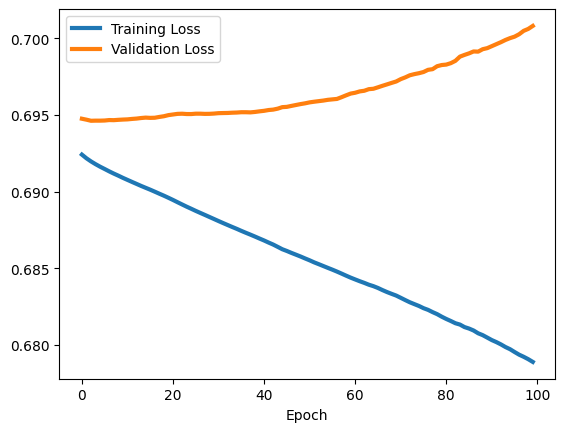

In [100]:

# PyTorch
import torch
import torch.nn.functional as F
from sklearn.metrics import accuracy_score

# 創建模型架構
class Model(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Model, self).__init__()
        self.hidden1 = torch.nn.Linear(input_size, hidden_size)
        self.hidden2 = torch.nn.Linear(hidden_size, hidden_size)
        self.predict = torch.nn.Linear(hidden_size, output_size)

    def forward(self, x):
        output1 = F.relu(self.hidden1(x))
        output2 = F.relu(self.hidden2(output1))
        output = self.predict(output2)  # 不用 softmax
        return output

# 模型和優化器初始化
model = Model(X_test.shape[1], 32, 2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.0)
loss_func = torch.nn.CrossEntropyLoss()

# 資料格式轉成 PyTorch 專用格式
x_data = torch.tensor(X_train.values, dtype=torch.float32)
y_data = torch.tensor(y_train.values, dtype=torch.long)  # 類別標籤格式
x_test_data = torch.tensor(X_test.values, dtype=torch.float32)
y_test_data = torch.tensor(y_test.values, dtype=torch.long)  # 類別標籤格式

batch_size = 16
num_epochs = 100
num_batches = len(X_train) // batch_size
loss_list = []
test_loss_list = []

# 訓練模型
for epoch in range(num_epochs):
    for i in range(num_batches):
        start = i * batch_size
        end = start + batch_size
        prediction = model(x_data[start:end])
        loss = loss_func(prediction, y_data[start:end])

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # 計算訓練集損失
    loss = loss_func(model(x_data), y_data)
    loss_list.append(loss.item())

    # 計算測試集損失
    test_loss = loss_func(model(x_test_data), y_test_data)
    test_loss_list.append(test_loss.item())

print(loss_list)
print(test_loss_list)


# 視覺化呈現結果
import matplotlib.pyplot as plt
plt.plot(loss_list, linewidth=3)
plt.plot(test_loss_list, linewidth=3)
plt.legend(('Training Loss','Validation Loss'))
plt.xlabel('Epoch')

training loss下降了，但validaion loss上升，有overfitting的問題